# Import Libraries

In [ ]:
!pip install category_encoders
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score, log_loss
from sklearn.metrics import RocCurveDisplay  # Replaces plot_roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from xgboost import plot_tree,plot_importance
import statistics as st
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorflow as tf
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from tensorflow.keras.regularizers import l2
from sklearn.pipeline import make_pipeline
#from pycaret.classification import *
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('JobChange.csv')

# EDA

In [ ]:
print(f"Data frame's shape is: {df.shape}")
df.sample(5)

Data frame's shape is: (19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5570,1380,city_97,0.925,Male,Has relevent experience,no_enrollment,Masters,STEM,9,NaN,NaN,1,34,0.0
12416,32078,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,4,50-99,Funded Startup,3,23,0.0
3953,27149,city_71,0.884,Male,Has relevent experience,no_enrollment,Masters,STEM,17,50-99,Funded Startup,1,6,0.0
7188,7898,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,100-500,Pvt Ltd,1,20,0.0
8092,13179,city_50,0.896,Male,Has relevent experience,no_enrollment,Masters,STEM,10,50-99,Pvt Ltd,1,122,0.0


In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
# Creating a summary DataFrame
info_df = pd.DataFrame({
    'Column': df.columns,
    #'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes,
    'Has Nulls': df.isnull().any()  # Boolean column to indicate if there are any nulls
})

print(info_df)


                                        Column    Dtype  Has Nulls
enrollee_id                        enrollee_id    int64      False
city                                      city   object      False
city_development_index  city_development_index  float64      False
gender                                  gender   object       True
relevent_experience        relevent_experience   object      False
enrolled_university        enrolled_university   object       True
education_level                education_level   object       True
major_discipline              major_discipline   object       True
experience                          experience   object       True
company_size                      company_size   object       True
company_type                      company_type   object       True
last_new_job                      last_new_job   object       True
training_hours                  training_hours    int64      False
target                                  target  float64      F

In [ ]:
df.isna().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [ ]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(exclude='object').columns

In [ ]:
for i in df[cat]:
    print("Column ",i, "-->", df[i].unique())
    print("--------------------------------------------------------------------------------------------")

Column  city --> ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'ci

## Graph visualization

In [ ]:
# Pie chart of Educational level
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

el = df['education_level'].value_counts().reset_index()
el.columns = [
    'education_level',
    'percent'
]
el['percent'] /= len(df)

fig = px.pie(
    el,
    names='education_level',
    values='percent',
    title='Education_level',
    width=800,
    height=500
)

fig.show()

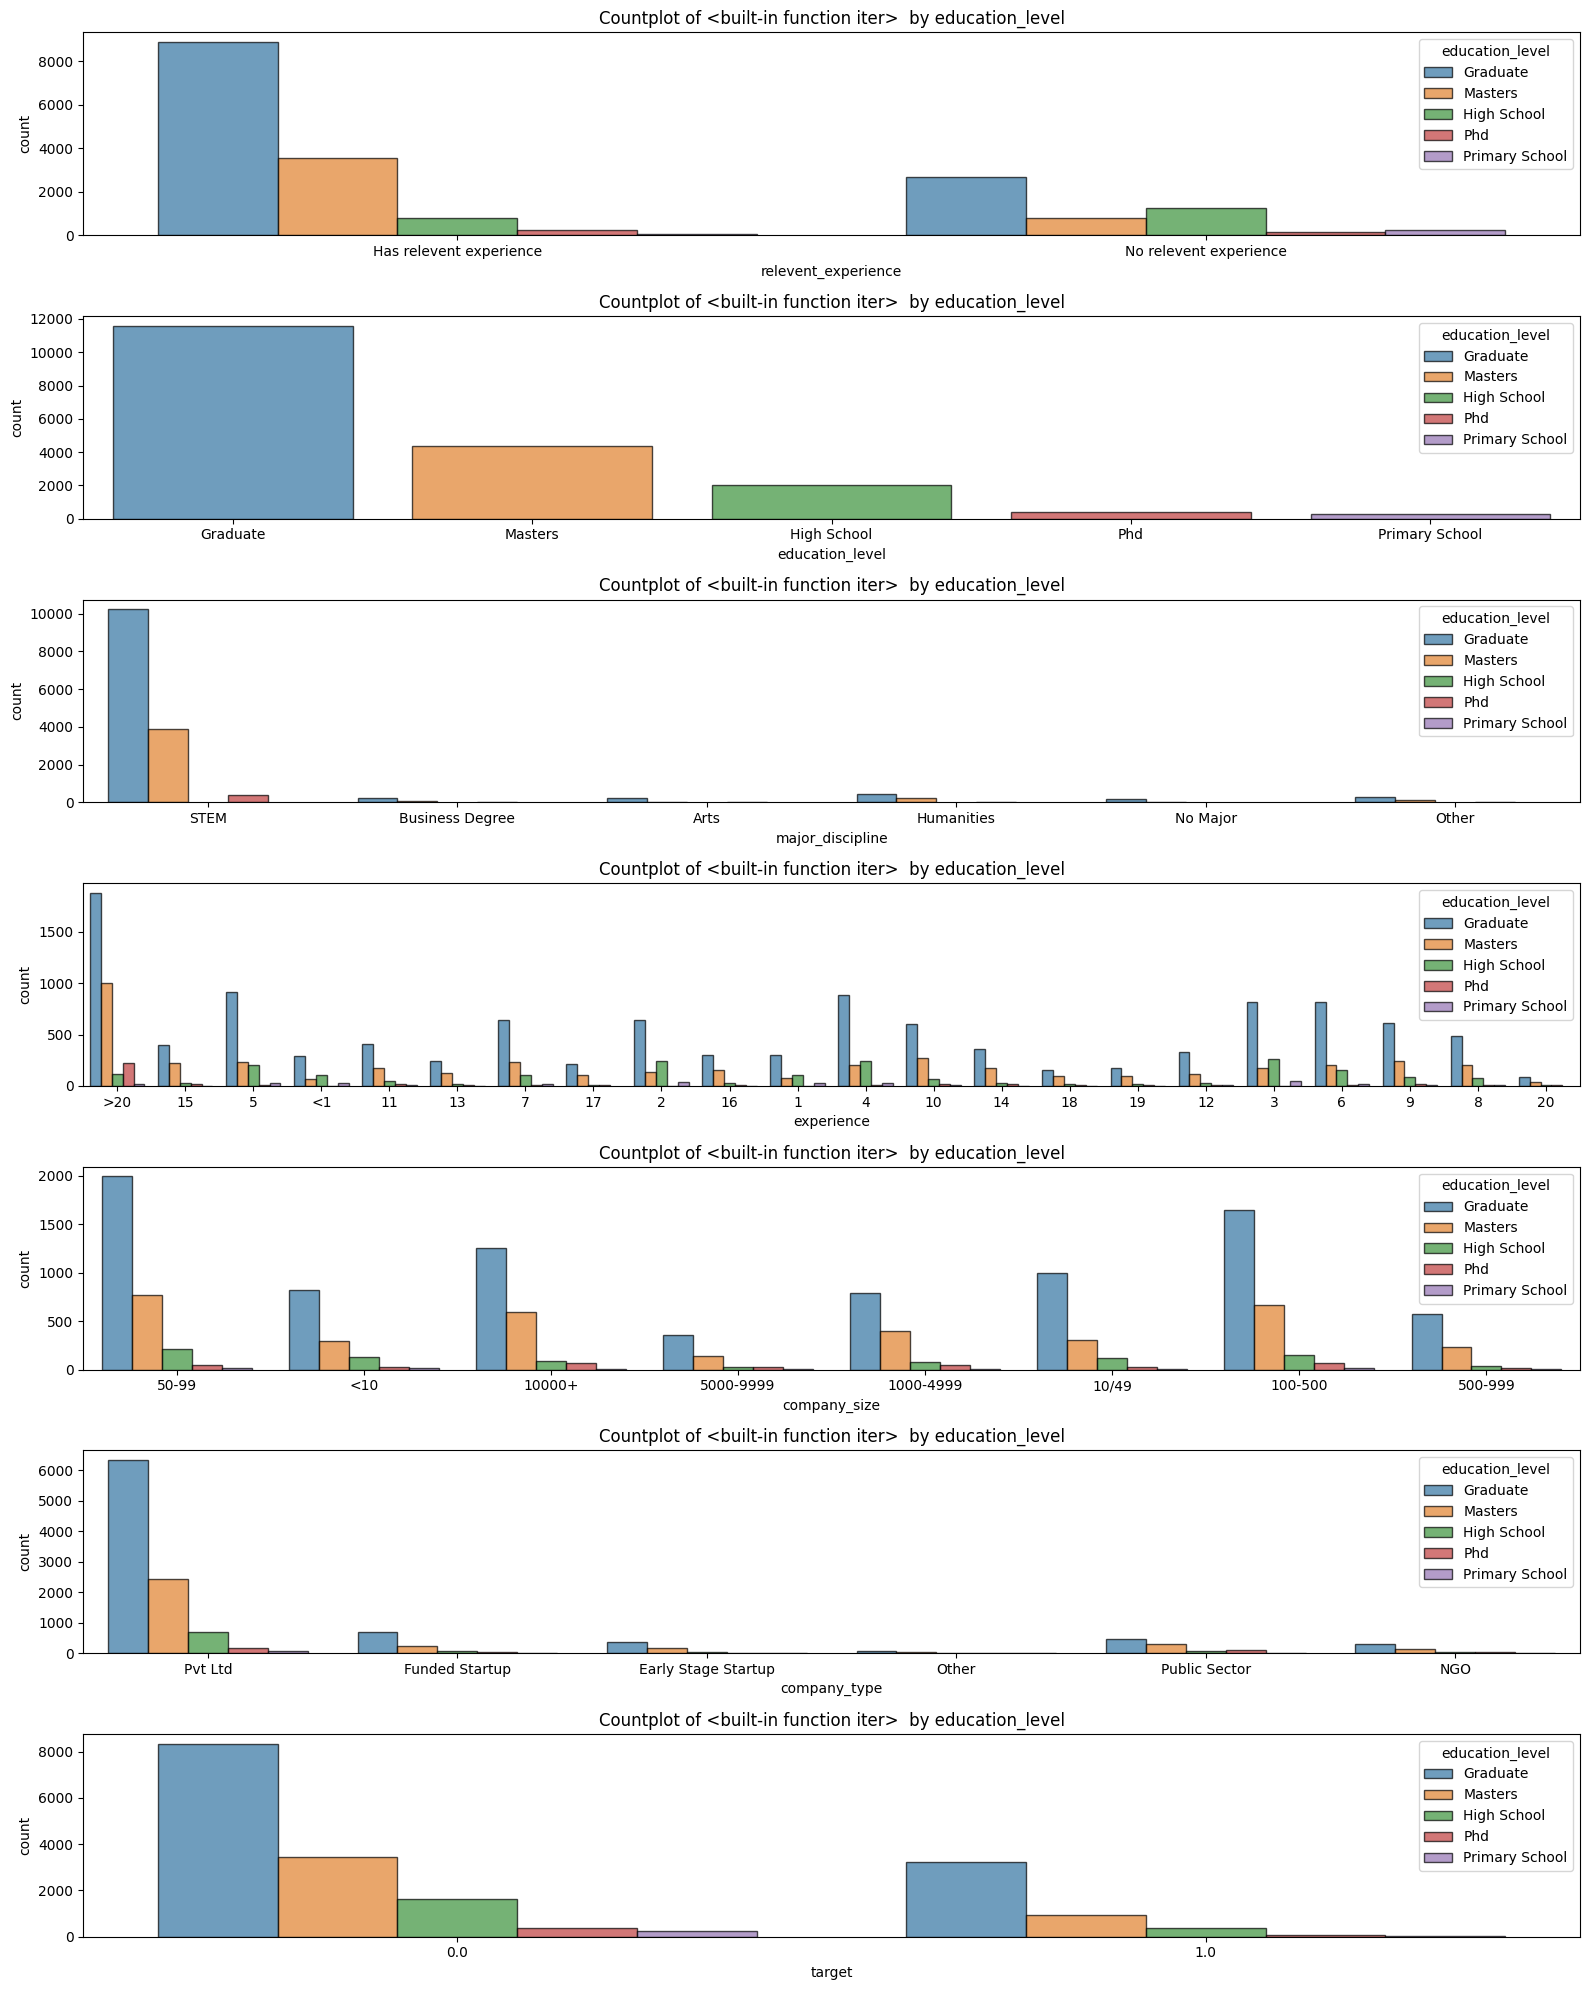

In [ ]:
#Countplots showing the frequency of each category with respect to education level
plt.figure(figsize=[16,20])
plot = ["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type","target"]
n = 1
for i in plot:
    plt.subplot(7,1,n)
    sns.countplot(x=i, hue='education_level', edgecolor="black", alpha=0.7, data=df)
    plt.title("Countplot of {}  by education_level".format(iter))
    n+=1

plt.tight_layout()
plt.show()

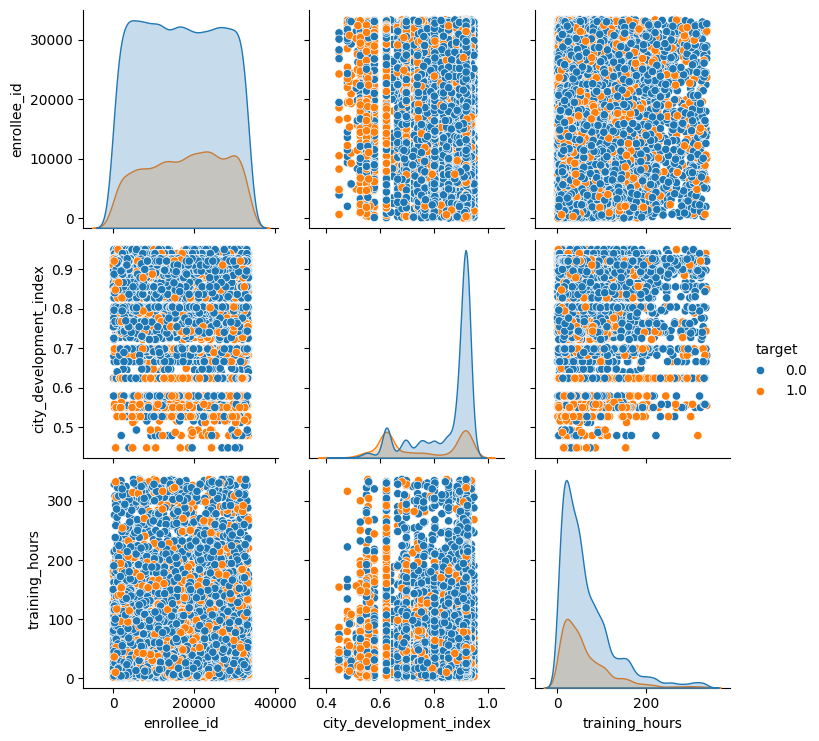

In [ ]:
sns.pairplot(df, hue ='target')

target
0.0    14381
1.0     4777
Name: count, dtype: int64


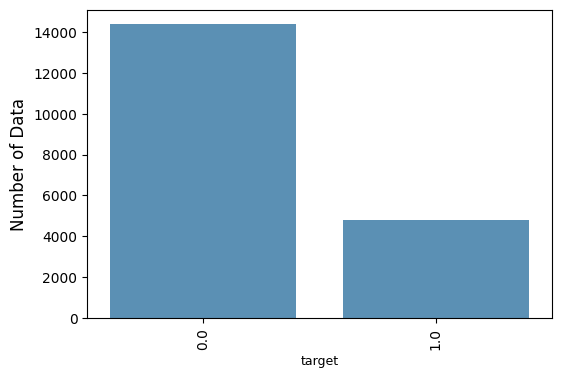

In [ ]:
# 0 – Not looking for job change
# 1 – Looking for a job change

t_count = df['target'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x = t_count.index, y = t_count.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t_count)
plt.show();

# Preprocessing

## handling followed by the list

* Removing outlier in expereience feature
* Filling NA with new class ("unknown")
* Changing range value to fixed integers in company_size feature
* Changing some classes with string values to integers
* Replacing "city_" in all records of city feature to get only the city name
* Nominal Encoding on relevent_experience feature


In [ ]:
#data Before the preprocess
print("shape of df:",df.shape)
info_df

shape of df: (19158, 14)


,Column,Dtype,Has Nulls
enrollee_id,enrollee_id,int64,False
city,city,object,False
city_development_index,city_development_index,float64,False
gender,gender,object,True
relevent_experience,relevent_experience,object,False
enrolled_university,enrolled_university,object,True
education_level,education_level,object,True
major_discipline,major_discipline,object,True
experience,experience,object,True
company_size,company_size,object,True


In [ ]:
# Removing outlier in expereience feature
def clean_experience(df):
    for i in df["experience"]:
        if(i==">20"):
            df["experience"][df["experience"]==i]=30
        if(i == "<1"):
            df["experience"][df["experience"]==i]=0

    df["experience"] = df["experience"].fillna(0)
    df["experience"] = df['experience'].astype('int')

# Filling NA with new class ("unknown")
def clean_NAN(df):
    df["gender"] = df["gender"].fillna("Unknown")
    df["education_level"]=df["education_level"].fillna("Unknown")
    df["major_discipline"].fillna(value="Unknown", inplace=True)
    df["experience"] = df["experience"].fillna(df["experience"].mean())
    df["company_type"] = df["company_type"].fillna("Unknown")

# Changing some classes with string values to integers
def clean_last_new_job(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["last_new_job"]:
        if i == "never" or i == np.NaN:
            i = 0
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == ">4":
            i = 6
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["last_new_job"]=pd.Series(converted_list_1)
    df["last_new_job"]=pd.Series(converted_list_2)
    df["last_new_job"] = df["last_new_job"].fillna(0)
    df["last_new_job"] = df["last_new_job"].astype('int')

# Replacing "city_" in all records of city feature to get only the city name
def clean_city(df):
    converted_list_1 = []
    for i in range(len(df["city"])):
        j = df["city"][i].replace("city_","")
        converted_list_1.append(j)
    df["city"]=pd.Series(converted_list_1)
    df["city"] = df["city"].astype('int')

# Nominal Encoding on relevent_experience feature
def clean_relevent_experience(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["relevent_experience"]:
        if i == "Has relevent experience":
            i = 1
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == "No relevent experience":
            i = 0
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["relevent_experience"]=pd.Series(converted_list_1)
    df["relevent_experience"]=pd.Series(converted_list_2)

In [ ]:
# Changing range value to fixed integers in company_size feature
def clean_company_size_1(df):
    converted_list_1 = []
    converted_list_2 = []
    converted_list_3 = []
    for i in df["company_size"]:
        if i == "10/49":
            i = "10-49"
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == "<10":
            i = '1-9'
            converted_list_2.append(i)
        converted_list_2.append(i)
        if i == "10000+":
            i = '10000-20000'
            converted_list_3.append(i)
        converted_list_3.append(i)
    df["company_size"]=pd.Series(converted_list_1)
    df["company_size"]=pd.Series(converted_list_2)
    df["company_size"]=pd.Series(converted_list_3)
    df["company_size"]=df["company_size"].fillna("0-0")
    new = df['company_size'].str.split("-", n = 1, expand = True)
    df['company_size_min']= new[0]
    df['company_size_max']= new[1]
    df["company_size_max"] = df['company_size_max'].astype('int')
    df["company_size_min"] = df['company_size_min'].astype('int')

In [ ]:
# One Hot encoding base function
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

# Applying one hot encoding on all required columns
def apply_one_hot_encoding(df):
    df_final = one_hot_encoding(df,"enrolled_university")
    df_final = one_hot_encoding(df_final,"gender")
    df_final = one_hot_encoding(df_final,"education_level")
    df_final = one_hot_encoding(df_final,"major_discipline")
    df_final = one_hot_encoding(df_final,"company_type")
    return df_final

In [ ]:
def clean_company_size_2(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["company_size_min"]:
        if i == 0:
            i = int(df["company_size_min"].mean())
            converted_list_1.append(i)
        converted_list_1.append(i)
    for i in df["company_size_max"]:
        if i == 0:
            i = int(df["company_size_max"].mean())
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["company_size_min"]=pd.Series(converted_list_1)
    df["company_size_max"]=pd.Series(converted_list_2)
    df["company_size_min"] = df["company_size_min"].fillna(int(df["company_size_min"].mean()))
    df["company_size_max"] = df["company_size_max"].fillna(int(df["company_size_max"].mean()))

In [ ]:
# Function to remove unwanted columns
def remove_columns(df):
    df_final = df.drop(['enrollee_id','company_size'],axis=1)
    return df_final

# Independent & Dependent Variables Split
def XY_Split(df):
    X = df.drop("target",axis=1)
    Y = pd.DataFrame(df["target"])
    return X,Y

In [ ]:
def clean_data(df):
    clean_experience(df)
    clean_NAN(df)
    clean_company_size_1(df)
    clean_last_new_job(df)
    clean_city(df)
    clean_relevent_experience(df)
    df_one_hot = apply_one_hot_encoding(df)
    clean_company_size_2(df_one_hot)
    df_final = remove_columns(df_one_hot)
    X,Y = XY_Split(df_final)
    return df_final,X,Y

In [ ]:
clw_df,X,Y = clean_data(df)

In [ ]:
clw_df.head()

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,target,company_size_min,company_size_max
0,103,0.920,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,36,1.0,2124,4476
1,40,0.776,1,0,0,0,0,1,0,0,...,0,0,0,0,0,6,47,0.0,2124,4476
2,21,0.624,0,1,0,0,0,0,1,0,...,0,0,0,0,0,6,83,0.0,50,99
3,115,0.789,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,52,1.0,2124,4476
4,162,0.767,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,8,0.0,2124,4476


In [ ]:
info_clw_df = pd.DataFrame({
    'Column': clw_df.columns,
    #'Non-Null Count': clw_df.notnull().sum(),
    'Dtype': clw_df.dtypes,
    'Has Nulls': clw_df.isnull().any()  # Boolean column to indicate if there are any nulls
})
print("shape of clw_df",clw_df.shape)
info_clw_df

shape of clw_df (19158, 37)


,Column,Dtype,Has Nulls
city,city,int64,False
city_development_index,city_development_index,float64,False
gender_Male,gender_Male,int64,False
gender_Unknown,gender_Unknown,int64,False
gender_Female,gender_Female,int64,False
gender_Other,gender_Other,int64,False
relevent_experience,relevent_experience,int64,False
enrolled_university_no_enrollment,enrolled_university_no_enrollment,int64,False
enrolled_university_Full time course,enrolled_university_Full time course,int64,False
enrolled_university_Part time course,enrolled_university_Part time course,int64,False


## Imbalanced data check

is imbalancwd !!


---


method : SMOTE(oversampling)

### SMOTE

In [ ]:
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

target
1.0    14381
0.0    14381
Name: count, dtype: int64


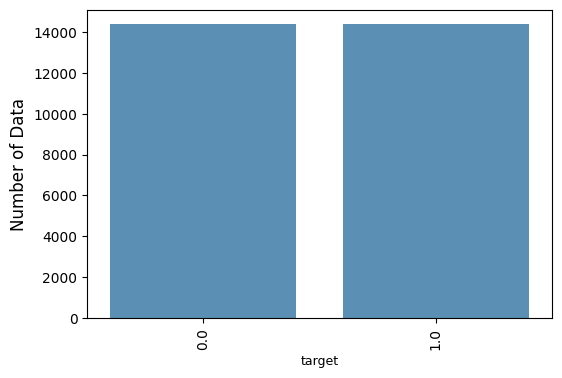

In [ ]:
# Class Balanced

t_count = Y['target'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x = t_count.index, y = t_count.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t_count)
plt.show();

## normalizing

In [ ]:
# Normalizing the independent features
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(X)

## split train test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,stratify=Y)

# NB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def train_model(model, params):
    print("For", str(model).split("(")[0])

    # GridSearchCV to find the best model
    gsc = GridSearchCV(model, params, cv=5)
    gsc.fit(X_train, y_train)
    gsc_best = gsc.best_estimator_

    # Predictions
    y_pred = gsc_best.predict(X_test)

    # Probabilities (for classification models)
    if hasattr(gsc_best, "predict_proba"):
        y_prob = gsc_best.predict_proba(X_test)

    # Best parameters from GridSearchCV
    print("\nBest Parameters : ", gsc.best_params_)

    # Evaluation metrics
    print("\nAccuracy: ", metrics.accuracy_score(y_test, y_pred))
    print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
    print("\n")


In [ ]:
train_model(GaussianNB(),{'var_smoothing': np.logspace(0,-9, num=100)})

For GaussianNB

Best Parameters :  {'var_smoothing': 0.23101297000831597}

Accuracy:  0.6963323483399966
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.47      0.61      2877
         1.0       0.63      0.93      0.75      2876

    accuracy                           0.70      5753
   macro avg       0.75      0.70      0.68      5753
weighted avg       0.75      0.70      0.68      5753

Confusion Matrix:
 [[1338 1539]
 [ 208 2668]]




# ANN


---

Artificial Neural Network


In [ ]:
# Base ANN network with Dense & Dropout layers

# Params
factor=0.0001           # ป้องกัน overfitting ของ weight
rate=0.4                # ทำงานเป็น treshold

# Model Structure
# use relu - sigmoid
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(160,input_shape=(36,),activation="relu",kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(120,activation="relu",kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(80,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(40,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(20,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(10,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(units=1, activation='sigmoid')])


In [ ]:
# Function for plotting metrics
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [ ]:
# callback function for accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get("val_accuracy")>0.95):
      print("Reached the accuracy required (ie) 90%", logs)
      self.model.stop_training=True

callback = myCallback()

In [ ]:
# Compiling the ANN model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the model with callbacks & validation split
history = model.fit(X_train, y_train, batch_size = 256,verbose=2, epochs = 100,callbacks=[callback],validation_split=0.25)

Epoch 1/100
68/68 - 4s - 54ms/step - accuracy: 0.5468 - loss: 0.7235 - val_accuracy: 0.7328 - val_loss: 0.6935
Epoch 2/100
68/68 - 0s - 7ms/step - accuracy: 0.6861 - loss: 0.6706 - val_accuracy: 0.7742 - val_loss: 0.6236
Epoch 3/100
68/68 - 0s - 7ms/step - accuracy: 0.7456 - loss: 0.6075 - val_accuracy: 0.8109 - val_loss: 0.5257
Epoch 4/100
68/68 - 1s - 9ms/step - accuracy: 0.7815 - loss: 0.5318 - val_accuracy: 0.8270 - val_loss: 0.4191
Epoch 5/100
68/68 - 1s - 9ms/step - accuracy: 0.7969 - loss: 0.4778 - val_accuracy: 0.8291 - val_loss: 0.4252
Epoch 6/100
68/68 - 1s - 9ms/step - accuracy: 0.8061 - loss: 0.4585 - val_accuracy: 0.8354 - val_loss: 0.4063
Epoch 7/100
68/68 - 1s - 11ms/step - accuracy: 0.8179 - loss: 0.4415 - val_accuracy: 0.8345 - val_loss: 0.3906
Epoch 8/100
68/68 - 1s - 13ms/step - accuracy: 0.8184 - loss: 0.4379 - val_accuracy: 0.8349 - val_loss: 0.3899
Epoch 9/100
68/68 - 1s - 19ms/step - accuracy: 0.8230 - loss: 0.4254 - val_accuracy: 0.8373 - val_loss: 0.3742
Epoch 

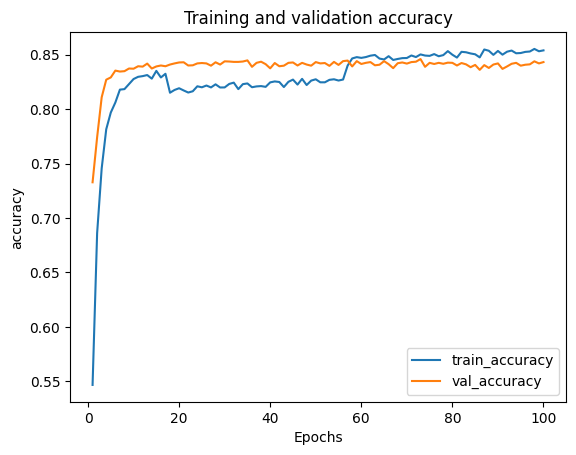

In [ ]:
# Accuracy PLot on validation & Train Data
plot_metric(history, 'accuracy')

In [ ]:
from sklearn import metrics
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1score = metrics.f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f} ")
print(f"Precision: {precision:.4f} ")
print(f"F1-Score: {f1score:.4f}")
print(f"ROC AUC: {roc_auc:.4f} ")


180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8462
Recall: 0.8286 
Precision: 0.8587 
F1-Score: 0.8434
ROC AUC: 0.9189 


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      2877
         1.0       0.86      0.83      0.84      2876

    accuracy                           0.85      5753
   macro avg       0.85      0.85      0.85      5753
weighted avg       0.85      0.85      0.85      5753

Confusion Matrix:
[[2485  392]
 [ 493 2383]]


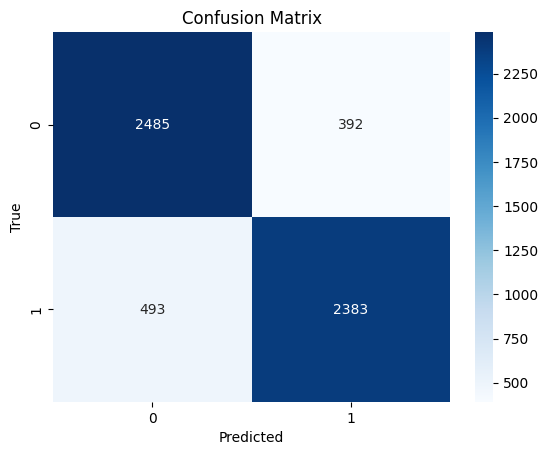

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# feature relationship

In [ ]:
#Get the weights from the first layer
weights = model.layers[0].get_weights()[0]
weights.shape

(36, 160)

In [ ]:
weights

array([[ 0.02488841,  0.15940847, -0.0961488 , ..., -0.01097153,
        -0.12002149,  0.06064371],
       [ 0.10172015, -0.13040793, -0.04939207, ...,  0.07705082,
        -0.2645405 , -0.0380553 ],
       [ 0.02537976,  0.00799685, -0.09524783, ..., -0.19361633,
         0.02306267, -0.03968531],
       ...,
       [ 0.10727933,  0.01511094,  0.26785776, ...,  0.02245893,
        -0.01258498, -0.008904  ],
       [-0.00590234,  0.00879553,  0.03009915, ...,  0.07584539,
         0.00076851,  0.08297769],
       [ 0.00655459, -0.06823242,  0.01669253, ..., -0.1145559 ,
         0.00095878, -0.00116961]], dtype=float32)

In [ ]:
#Calculate feature importance as the sum of absolute weights
feature_importance = np.sum(np.abs(weights), axis=1)

#Display feature importance
l = {}
for i, score in enumerate(feature_importance):
    # 12 is the average score, so we will use it as an threshold to select the informative features
    if score > 12:
      l[f'{clw_df.columns[i]}'] = score

l = dict(sorted(l.items(), key=lambda item: item[1], reverse=True))
for i in l:
    print(f"{i}: {l[i]:.4f}")

city_development_index: 18.8372
city: 14.8967
company_type_Early Stage Startup: 14.2918
company_type_Unknown: 14.0142
company_type_NGO: 13.9465
education_level_Phd: 13.6467
company_type_Funded Startup: 13.5954
experience: 13.3864
gender_Female: 13.2686
company_type_Pvt Ltd: 13.2198
company_type_Public Sector: 12.8514
enrolled_university_Part time course: 12.6178
education_level_Graduate: 12.4926
education_level_Masters: 12.4387
major_discipline_Unknown: 12.3711
training_hours: 12.3547
enrolled_university_nan: 12.3064
company_type_Other: 12.2617
major_discipline_No Major: 12.2280


In [ ]:
# show 19 features that informative to the model
len(l)

19

In [ ]:
# this is the average score, so we will use 12 as an threshold to select the informative features
feature_importance.mean()

12.218771

In [ ]:
for i in l.keys():
  print(i)

city_development_index
city
company_type_Early Stage Startup
company_type_Unknown
company_type_NGO
education_level_Phd
company_type_Funded Startup
experience
gender_Female
company_type_Pvt Ltd
company_type_Public Sector
enrolled_university_Part time course
education_level_Graduate
education_level_Masters
major_discipline_Unknown
training_hours
enrolled_university_nan
company_type_Other
major_discipline_No Major
